In [110]:
import requests
from bs4 import BeautifulSoup as bs

import argparse
import sys

import json
import pandas as pd
import glob
import matplotlib.pyplot as pls 
%matplotlib inline  

In [68]:
#path = r'C:\Users\mikaa\Desktop\hw-6-MikaArmenta'
allFiles= glob.glob("*.csv")
frame = pd.DataFrame()
datalist=[]
for f in allFiles:
    header = pd.read_csv(f, nrows = 1).dropna(axis = 1)
    d = header.iloc[0].to_dict()
    df = pd.read_csv(f, index_col = 0, thousands = ",", skiprows = [1])
    df.rename(inplace = True, columns = d) # rename to democrat/republican
    df.dropna(inplace = True, axis = 1)    # drop empty columns
    df["Year"] = f[-8:-4:1]
    df2=df[0:5]
    mask=['Democratic', 'Republican', 'Total Votes Cast', 'Year']
    df3=df2[mask]
    datalist.append(df3)
frame=pd.concat(datalist)
frame['Republican Share'] = frame['Republican']/frame['Total Votes Cast']


In [109]:
frame['Republican Share'] = frame['Republican']/frame['Total Votes Cast']

Acc=frame[0:120:5]
Alb=frame[1:120:5]
Ale=frame[2:120:5]
All=frame[3:120:5]
Ame=frame[4:120:5]

print(Alb)


                         Democratic  Republican  Total Votes Cast  Year  \
County/City                                                               
Albemarle County               1383         366              1801  1924   
Albemarle County               1571         846              2417  1928   
Albemarle County               1949         508              2491  1932   
Albemarle County               1825         635              2467  1936   
Albemarle County               1648         804              2458  1940   
Albemarle County               1725         964              2701  1944   
Albemarle County               1178         984              2443  1948   
Albemarle County               1642        2523              4183  1952   
Albemarle County               1412        2508              4386  1956   
Albemarle County               2102        3135              5272  1960   
Albemarle County               3062        3251              6315  1964   
Albemarle County         

In [106]:
print(frame.head(15))

                  Democratic  Republican  Total Votes Cast  Year
County/City                                                     
Accomack County         2087         307              2426  1924
Albemarle County        1383         366              1801  1924
Alexandria City         1136         556              1958  1924
Alleghany County         589         856              1628  1924
Amelia County            372         153               540  1924
Accomack County         1826        1367              3193  1928
Albemarle County        1571         846              2417  1928
Alexandria City         1307        1617              2924  1928
Alleghany County         622        1642              2264  1928
Amelia County            498         277               775  1928
Accomack County         2458         527              3007  1932
Albemarle County        1949         508              2491  1932
Alexandria City         2941        1199              4184  1932
Alleghany County        1

In [72]:
Acc=[]
Alb=[]
Ale=[]
All=[]
Ame=[]


In [87]:
frame.index

Index(['Accomack County', 'Albemarle County', 'Alexandria City',
       'Alleghany County', 'Amelia County', 'Accomack County',
       'Albemarle County', 'Alexandria City', 'Alleghany County',
       'Amelia County',
       ...
       'Accomack County', 'Albemarle County', 'Alexandria City',
       'Alleghany County', 'Amelia County', 'Accomack County',
       'Albemarle County', 'Alexandria City', 'Alleghany County',
       'Amelia County'],
      dtype='object', name='County/City', length=120)

In [90]:
for line in frame[index]:
    print(line)

NameError: name 'index' is not defined

In [ ]:
for line in frame:
    if index="Accomack County":
        AccLine=line
        Acc.append(AccLine)
print(Acc)

In [84]:
frame.iloc[1]

Democratic          1383
Republican           366
Total Votes Cast    1801
Year                1924
Name: Albemarle County, dtype: object

In [71]:
print(frame.head(15))

                  Democratic  Republican  Total Votes Cast  Year
County/City                                                     
Accomack County         2087         307              2426  1924
Albemarle County        1383         366              1801  1924
Alexandria City         1136         556              1958  1924
Alleghany County         589         856              1628  1924
Amelia County            372         153               540  1924
Accomack County         1826        1367              3193  1928
Albemarle County        1571         846              2417  1928
Alexandria City         1307        1617              2924  1928
Alleghany County         622        1642              2264  1928
Amelia County            498         277               775  1928
Accomack County         2458         527              3007  1932
Albemarle County        1949         508              2491  1932
Alexandria City         2941        1199              4184  1932
Alleghany County        1

In [101]:
Acc=frame[0:120:5]
Alb=frame[1:120:5]
Ale=frame[2:120:5]
All=frame[3:120:5]
Ame=frame[4:120:5]

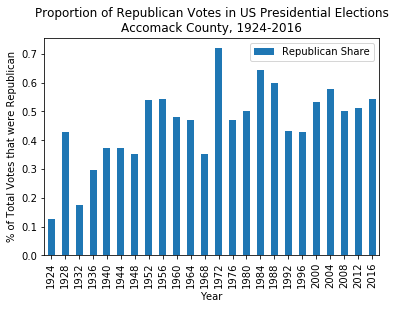

In [129]:
AccPlot=Acc.plot(x='Year', y='Republican Share', kind='bar', title= r'Proportion of Republican Votes in US Presidential Elections' + "\n" + 'Accomack County, 1924-2016')
AccPlot.set_xlabel("Year")
AccPlot.set_ylabel("% of Total Votes that were Republican")
AccPlot.get_figure().savefig('accomack_county.pdf', format='pdf')

AlbPlot=Alb.plot(x='Year', y='Republican Share', kind='bar', title= r'Proportion of Republican Votes in US Presidential Elections' + "\n" + 'Albemarle County, 1924-2016')
AlbPlot.get_figure().savefig('albemarle_county.pdf', format='pdf')
AlbPlot.set_xlabel("Year")
AlbPlot.set_ylabel("% of Total Votes that were Republican")

AlePlot=Ale.plot(x='Year', y='Republican Share', kind='bar', title= r'Proportion of Republican Votes in US Presidential Elections' + "\n" + 'Alexandria City, 1924-2016')
AlePlot.get_figure().savefig('alexandria_city.pdf', format='pdf')
AlePlot.set_xlabel("Year")
AlePlot.set_ylabel("% of Total Votes that were Republican")

AllPlot=All.plot(x='Year', y='Republican Share', kind='bar', title= r'Proportion of Republican Votes in US Presidential Elections' + "\n" + 'Alleghany County, 1924-2016')
AllPlot.get_figure().savefig('alleghany_county.pdf', format='pdf')
AllPlot.set_xlabel("Year")
AllPlot.set_ylabel("% of Total Votes that were Republican")

AmePlot=Ame.plot(x='Year', y='Republican Share', kind='bar', title= r'Proportion of Republican Votes in US Presidential Elections' + "\n" + 'Amelia County, 1924-2016')
AmePlot.get_figure().savefig('amelia_county.pdf', format='pdf')
AmePlot.set_xlabel("Year")
AmePlot.set_ylabel("% of Total Votes that were Republican")


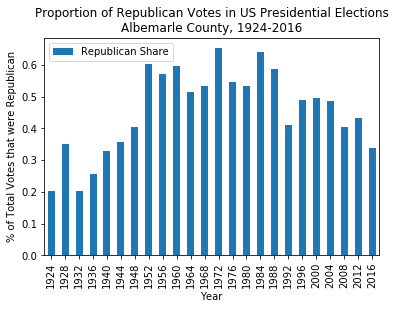

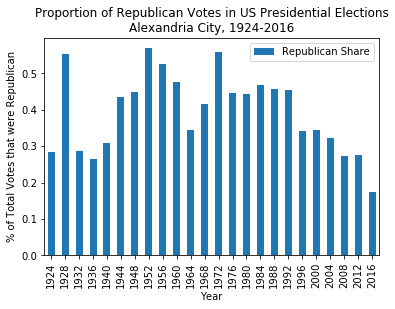

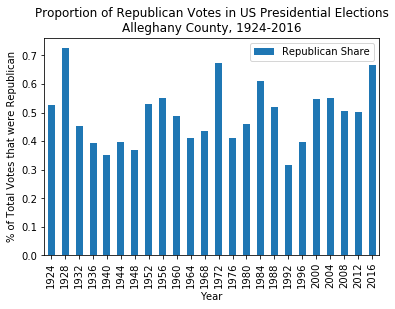

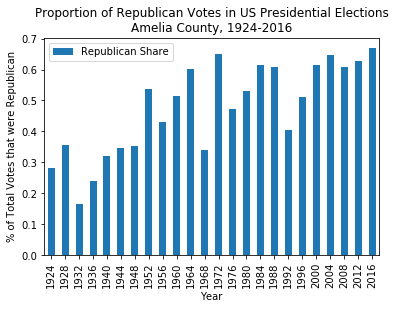

In [131]:
AlbPlot=Alb.plot(x='Year', y='Republican Share', kind='bar', title= r'Proportion of Republican Votes in US Presidential Elections' + "\n" + 'Albemarle County, 1924-2016')
AlbPlot.get_figure().savefig('albemarle_county.pdf', format='pdf')
AlbPlot.set_xlabel("Year")
AlbPlot.set_ylabel("% of Total Votes that were Republican")

AlePlot=Ale.plot(x='Year', y='Republican Share', kind='bar', title= r'Proportion of Republican Votes in US Presidential Elections' + "\n" + 'Alexandria City, 1924-2016')
AlePlot.get_figure().savefig('alexandria_city.pdf', format='pdf')
AlePlot.set_xlabel("Year")
AlePlot.set_ylabel("% of Total Votes that were Republican")

AllPlot=All.plot(x='Year', y='Republican Share', kind='bar', title= r'Proportion of Republican Votes in US Presidential Elections' + "\n" + 'Alleghany County, 1924-2016')
AllPlot.get_figure().savefig('alleghany_county.pdf', format='pdf')
AllPlot.set_xlabel("Year")
AllPlot.set_ylabel("% of Total Votes that were Republican")

AmePlot=Ame.plot(x='Year', y='Republican Share', kind='bar', title= r'Proportion of Republican Votes in US Presidential Elections' + "\n" + 'Amelia County, 1924-2016')
AmePlot.get_figure().savefig('amelia_county.pdf', format='pdf')
AmePlot.set_xlabel("Year")
AmePlot.set_ylabel("% of Total Votes that were Republican")


In [ ]:
Alb.plot(x='Year', y='Republican Share', kind='bar')
plt.savefig('albemarle_county.pdf')


Ale.plot(x='Year', y='Republican Share', kind='bar')
plt.savefig('alexandria_city.pdf')


All.plot(x='Year', y='Republican Share', kind='bar')
plt.savefig('alleghany_county.pdf')


In [105]:
print(Alb['Republican']['Total Votes Cast'])

KeyError: 'Total Votes Cast'

In [93]:
print(len(frame))

120


In [61]:
df.iloc[0:5]

,Democratic,Republican,Libertarian,Independent,Green,All Others,Total Votes Cast,Year
County/City,,,,,,,,
Accomack County,6740,8583,264,112,66,53,15818,2016
Albemarle County,33345,19259,2105,1059,450,508,56726,2016
Alexandria City,57242,13285,2020,1398,592,1233,75770,2016
Alleghany County,2166,4874,164,69,35,17,7325,2016
Amelia County,2128,4708,129,41,11,23,7040,2016


In [56]:
print(frame)

                      Democratic  Republican  Total Votes Cast  Year
County/City                                                         
Accomack County             2087         307              2426  1924
Albemarle County            1383         366              1801  1924
Alexandria City             1136         556              1958  1924
Alleghany County             589         856              1628  1924
Amelia County                372         153               540  1924
Amherst County              1092         129              1326  1924
Appomattox County            952         101              1071  1924
Arlington County            1209        1307              2921  1924
Augusta County              1920        1265              3263  1924
Bath County                  404         407               835  1924
Bedford County              1811         432              2274  1924
Bland County                 604         609              1217  1924
Botetourt County            1427  

In [ ]:
header = pd.read_csv(f, nrows = 1).dropna(axis = 1)
d = header.iloc[0].to_dict()

df = pd.read_csv("president_general_2004.csv", index_col = 0, thousands = ",", skiprows = [1])

df.rename(inplace = True, columns = d) # rename to democrat/republican
df.dropna(inplace = True, axis = 1)    # drop empty columns
df["Year"] = f[-8:-4:1]

In [50]:
print(allFiles[1])
print(allFiles[1][-8:-4:1])

president_general_1928.csv
1928


In [34]:
header = pd.read_csv("president_general_2004.csv", nrows = 1).dropna(axis = 1)
d = header.iloc[0].to_dict()

df = pd.read_csv("president_general_2004.csv", index_col = 0, thousands = ",", skiprows = [1])

df.rename(inplace = True, columns = d) # rename to democrat/republican
df.dropna(inplace = True, axis = 1)    # drop empty columns
df["Year"] = 2004

In [32]:
print(d)

{'Bush/ Cheney': 'Republican', 'Kerry/ Edwards': 'Democratic', 'Badnarik/ Campagna': 'Libertarian', 'Peroutka/ Baldwin': 'Constitution'}


In [35]:
print(df)

                       Republican  Democratic  Libertarian  Constitution  \
County/City                                                                
Accomack County              7726        5518           57            32   
Albemarle County            21189       22088          271            48   
Alexandria City             19844       41116          270            85   
Alleghany County             3962        3203           15            12   
Amelia County                3499        1862           12            23   
Amherst County               7758        4866           32            30   
Appomattox County            4366        2191           12            85   
Arlington County            29635       63987          526           148   
Augusta County              22100        7019           87           473   
Bath County                  1432         828            6             9   
Bedford County              21925        9102          102           266   
Bedford City